# Classificador Perceptron

## Definição

Um Perceptron é um neurônio artificial que pode ser usado para resolver problemas de classificação com um dataset linearmente separável. O algoritmo de classificação do Perceptron é considerado de aprendizagem supervisionada, uma vez que ele precisa dos rótulos de cada instância de dado para poder executar corretamente.

## Implementação

Abaixo se encontra uma classe de implementação de um classificador Perceptron retirada do livro texto. Essa classe possui um método fit que é usado para treinar o modelo de classificação.

In [1]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Escolher o Dataset de exemplo

Podemos usar o Iris Dataset para treinar o modelo. Esse dataset é muito conhecido na comunidade acadêmica de Data Science, pois é muito utilizado para fins educacionais. No dataset encontramos dados de três espécies de flores conhecidas como Iris e, com base nesses dados, podemos treinar um classificador para decidir a espécie de uma nova flor Iris coletada.

In [16]:
import pandas as pd

df = pd.read_csv('iris_dataset.csv').drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Selecionando labels

Como dito anteriormente, o classificador Perceptron só trabalha com dados linearmente separáveis, mas nosso dataset possui três labels, logo precisamos descartar uma label. Escolhemos trabalhar apenas com Iris Setosa e Iris Versicolor nesse exemplo. Através do gráfico abaixo podemos ver como as diferentes espécies se distribuem quando comparamos os comprimentos da sépala e da pétala de cada flor.

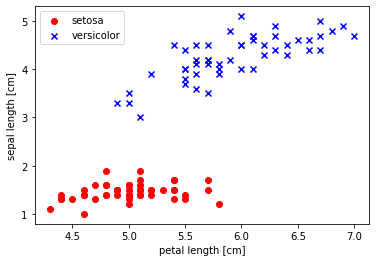

In [21]:
import matplotlib.pyplot as plt
import numpy as np

X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[0:50, 0], X[0:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

plt.xlabel('petal length [cm]')
plt.ylabel('sepal length [cm]')
plt.legend(loc='upper left')

plt.show()

## Treinando o modelo

Feita a análise do dataset, percebemos que podemos utilizar o classificador Perceptron nesse problema. Para isso, basta criar uma instância do classificador e invocar o método fit para treinar o modelo. No gráfico abaixo podemos ver em quantas épocas o classificador aprende a realizar a classificação e não comete mais erros.

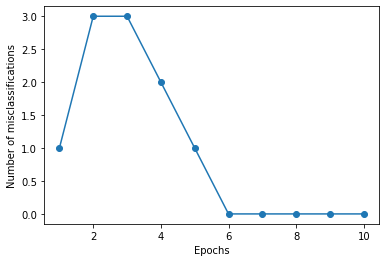

In [17]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Realizar classificação

Com o modelo treinado, podemos classificar nosso dataset. Para isso criamos uma função que separa as classes em regiões de decisão e plota um gráfico para podermos visualizar. 

In [25]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cian')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, resolution), 
                          np.arange(x1_min, x1_max, resolution))
    
    Z = classifier.predict(np.array([xx0.ravel(), xx1.ravel()]).T)
    Z = Z.reshape(xx0.shape)
    
    plt.contourf(xx0, xx1, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx0.min(), xx0.max())
    plt.ylim(xx1.min(), xx1.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, color=cmap(idx), marker=markers[idx], label=cl)

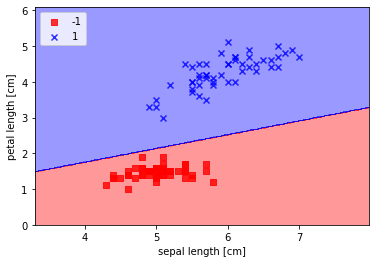

In [27]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Neurônios Linearmente Adaptáveis (Adaline)

## Definição

O algoritmo Adaline é uma evolução do Perceptron, a principal diferença é que os neurônios são atualizados com base em uma função de ativação linear ao invés de uma função binária

## Implementação

Abaixo temos a implementação de uma classe para treinar um modelo com algoritmo Adaline. Perceba que é bem semelhante à classe do Perceptron.

In [31]:
import numpy as np

class Adaline(object):
    """Adaptative Linear Neuron Classifier
    
    Parameters
    ---------------
    eta: float
        Learning rate (between 0.0 and 1.0)
    n_iter: int
        Passes over the training dataset.
        
    Attributes
    ---------------
    w_: ld-array
        Weights after fitting
    errors_: list
        Number of misclassifications in every epoch
    """
    
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """Fit training data
        
        Parameters
        --------------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors,
            where n_samples is the number of samples and n_features is the number of features
        y : array-like, shape = [n_samples]
            Target values
            
        Returns
        --------------
        self : object
        """
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        
        return self
    
    def net_input(self, X):
        """Calculate Net Input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Compute Linear Activation"""
        return self.net_input(X)
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

## Realizar Classificação

Podemos realizar a classificação do dataset usando o classificador Adaline assim como no Perceptron, para isso basta passar uma instância do Adaline para o método plot_decision_regions. Mas antes disso, devemos realizar dimensionamento do nosso dataset para extraírmos o máximo de performance. Uma técnica de dimensionamento é a padronização, que oferece ao dataset a propriedade de distribuição normal padrão.

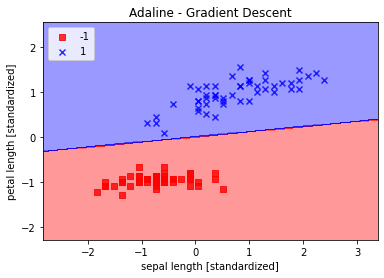

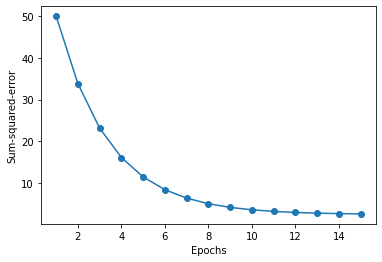

In [32]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

ada = Adaline(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()